In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy

In [4]:
# for every string executing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
bank_df = pd.read_csv('test_task_data_201808091645.csv', delimiter=';')

## Наши данные

In [6]:
bank_df.info()
bank_df.bank_type.replace('old bank', 'old_bank', inplace=True)
bank_df.eventdatetime = pd.to_datetime(bank_df.eventdatetime)
bank_df.installdatetime = pd.to_datetime(bank_df.installdatetime)
bank_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45889 entries, 0 to 45888
Data columns (total 8 columns):
eventdatetime      45889 non-null object
installdatetime    45889 non-null object
user_level         45889 non-null int64
pack               45889 non-null object
price              45889 non-null float64
customeruserid     45889 non-null object
countrycode        45887 non-null object
bank_type          45889 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 2.8+ MB


,eventdatetime,installdatetime,user_level,pack,price,customeruserid,countrycode,bank_type
0,2018-06-01 22:47:37,2018-05-22 22:49:44,120,piggy_bank,2.99,045CC293-E490-4F6A-9ED6-B0B1E302F245,AU,old_bank
1,2018-06-01 22:48:48,2018-05-17 15:12:13,59,pack_1,1.99,F7F650C9-D847-46C9-B3A4-9D9C4C75AB56,US,old_bank
2,2018-06-01 22:51:15,2018-05-30 16:02:33,28,pack_2,4.99,4f88616ca3347ee,US,old_bank
3,2018-06-01 22:52:33,2018-05-13 02:10:43,222,adventure_pack,4.99,80C3857A-C205-430D-A889-A1D08830AE50,US,old_bank
4,2018-06-01 22:52:34,2018-05-25 22:53:44,62,pack_1,1.99,5D21A355-AEB7-4141-BE13-554D738929EC,US,old_bank


In [7]:
bank_df.customeruserid.count()/bank_df.customeruserid.value_counts().count()

4.989019352033051

### Немного общей инфы
**По каждому предложению сколько раз его купили**

In [8]:
bank_df.pack.value_counts(sort=True)

pack_1            19741
pack_2            10192
pack_3             6118
pack_4             2508
piggy_bank         2235
starter_pack       1718
adventure_pack     1496
smart_offer_2       585
smart_offer_3       325
pack_5              261
smart_offer_1       222
pack_6              207
smart_offer_4       203
smart_offer_5        59
smart_offer_6        19
Name: pack, dtype: int64

**Сколько было покупок для каждой цены вообще**

1.99     19741
4.99     11688
9.99      6118
2.99      3953
19.99     2508
3.99       585
7.99       325
49.99      261
0.99       222
99.99      207
14.99      203
34.99       59
74.99       19
Name: price, dtype: int64

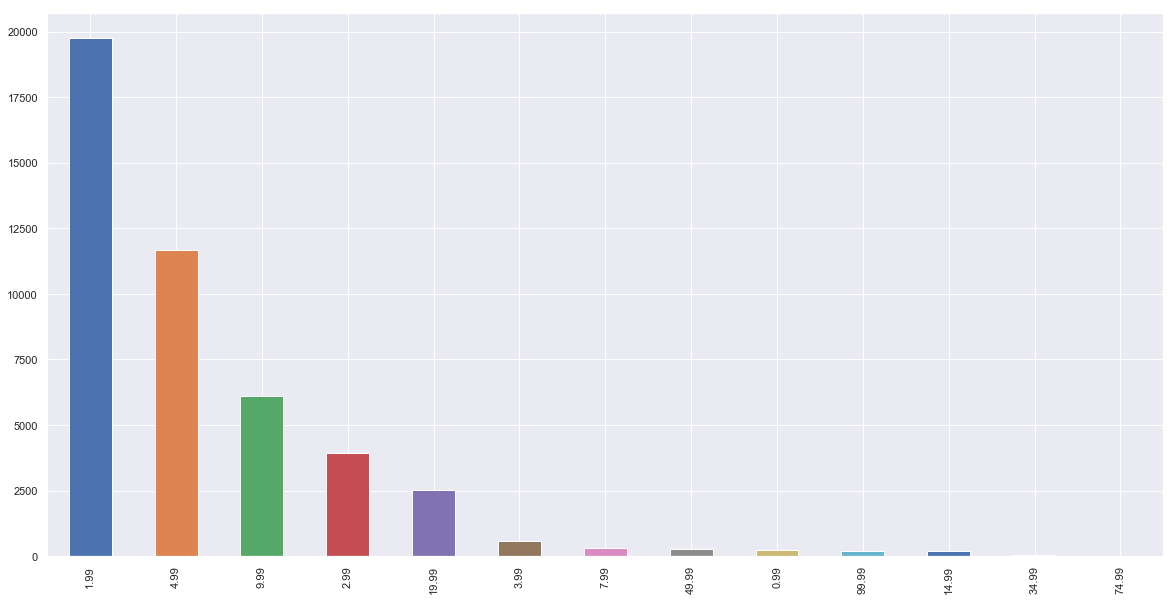

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
bank_df.price.value_counts()
bank_df.price.value_counts().plot.bar()

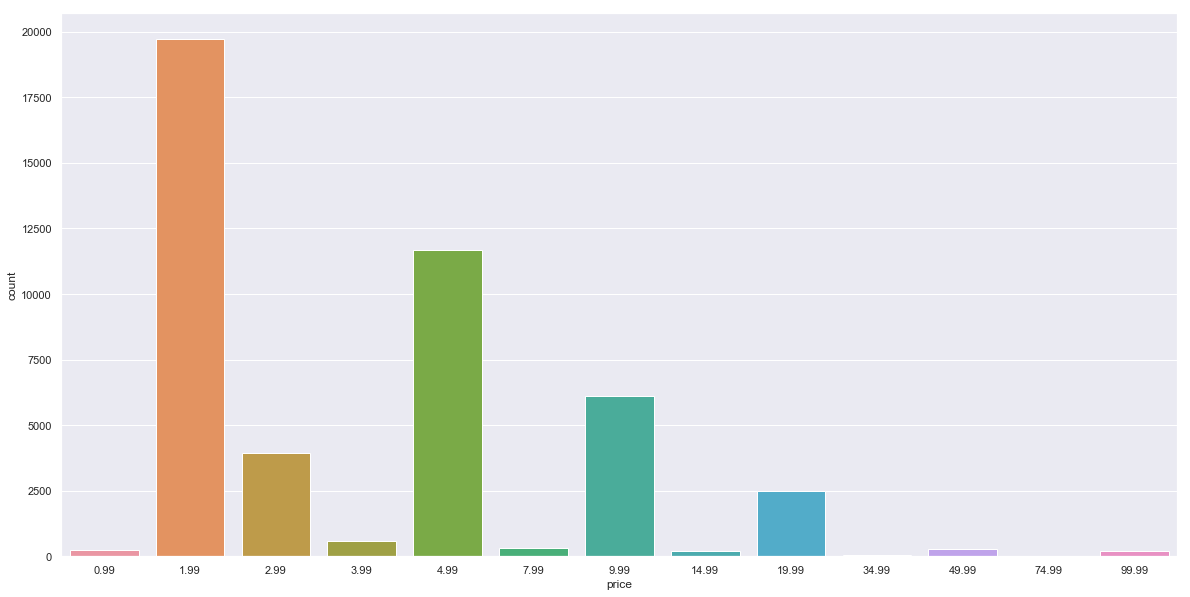

In [10]:
sns.countplot('price', data=bank_df)

Видно, что прайс в 35 и 75 совсем почти не покупается. Либо потому, что в банке во всплывающем окошке не появляются эти карточки, либо это никому не интересно. Скорее первое. Потому что остальные карточки с большим колвом продаж есть на экране. В общем с этой штукой можно поиграться и посмотреть. 

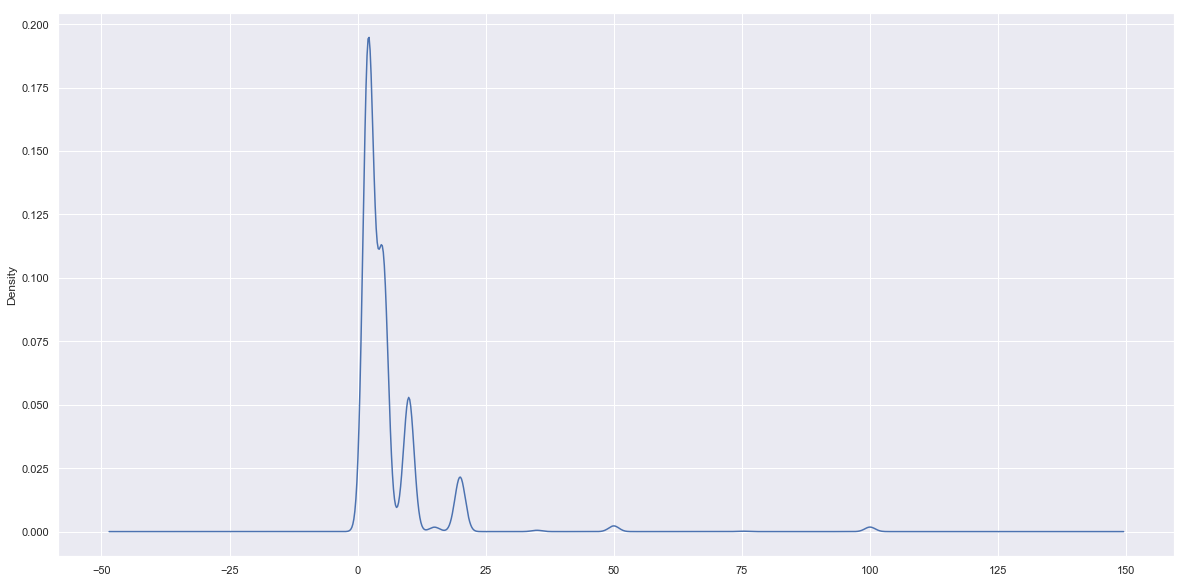

In [11]:
bank_df.price.plot(kind ='kde', figsize=(20,10), logy=False);

In [12]:
bank_df.groupby('pack').price.mean()

pack
adventure_pack     4.99
pack_1             1.99
pack_2             4.99
pack_3             9.99
pack_4            19.99
pack_5            49.99
pack_6            99.99
piggy_bank         2.99
smart_offer_1      0.99
smart_offer_2      3.99
smart_offer_3      7.99
smart_offer_4     14.99
smart_offer_5     34.99
smart_offer_6     74.99
starter_pack       2.99
Name: price, dtype: float64

In [13]:
print('smart pack exists only in new bank\n\n{}'.format(bank_df[bank_df.pack.str.contains('smart')].bank_type.value_counts()), end='\n\n')

smart pack exists only in new bank

new_bank    1413
Name: bank_type, dtype: int64



**Посчитаем в какой ценовой категории соотношение покупок больше всего** 

Тут получается, что покупки с ценником больше 10 не так уж и много. Опять же прайс меньше 10 делают в два раза больше выручки, чем прайс больше.

In [14]:
print('count of goods for price < 10 is', bank_df[bank_df.price < 10].price.count(), 
      'with all over amount of money', bank_df[bank_df.price < 10].price.sum())
print('count of goods for price > 10 is', bank_df[bank_df.price > 10].price.count(), 
      'with all over amount of money', bank_df[bank_df.price > 10].price.sum())
print('count of goods for price between 10 and 20 is', bank_df[(bank_df.price > 10) & (bank_df.price < 20)].price.count(), 
      'with all over amount of money', bank_df[(bank_df.price > 10) & (bank_df.price < 20)].price.sum())

count of goods for price < 10 is 42632 with all over amount of money 175696.68000000002
count of goods for price > 10 is 3257 with all over amount of money 90412.43
count of goods for price between 10 and 20 is 2711 with all over amount of money 53177.89000000001


### Банк старый, банк новый

Сколько операций было совершено в новом и старом банке? 
Операций в новом банке в полтора раза больше, чем в старом. Надо запомнить, это существенное различие. Также видно, что за счет новых предложений появился больше выбор. И люди этот выбор делают.

new_bank    27000
old_bank    18889
Name: bank_type, dtype: int64

coef for comparing = 1.4294033564508444


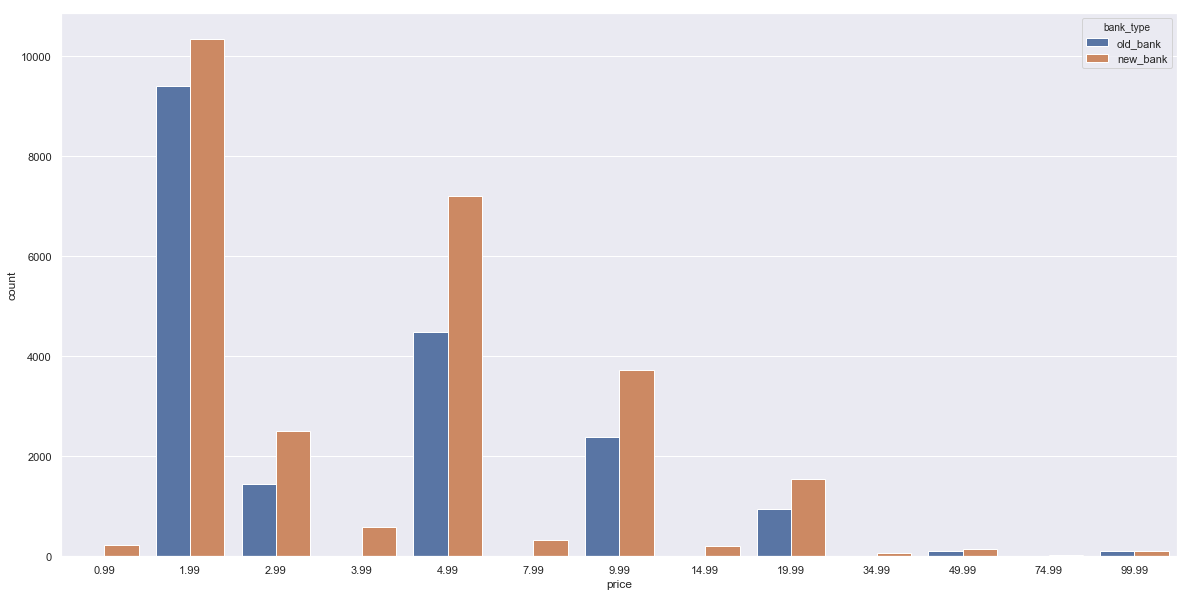

In [15]:
bank_df.bank_type.value_counts()
norm_coef = (bank_df.bank_type.value_counts()/bank_df.bank_type.value_counts()['old_bank'])[0]
print('coef for comparing = {}'.format(norm_coef))
sns.countplot('price', data=bank_df, hue='bank_type')

**Что там со средним чеком?** 

Кажется новый банк получше все таки продает. На графике плохо, но видно, что средний чек поднялся и распределение чека у нового банка похудело внизу и потолстело вверху, и можно предположить, что игроки теперь чаще покупают карточки дороже. 

average bill
bank_type
new_bank    5.996889
old_bank    5.516073
Name: price, dtype: float64

median bill
bank_type
new_bank    3.99
old_bank    2.99
Name: price, dtype: float64


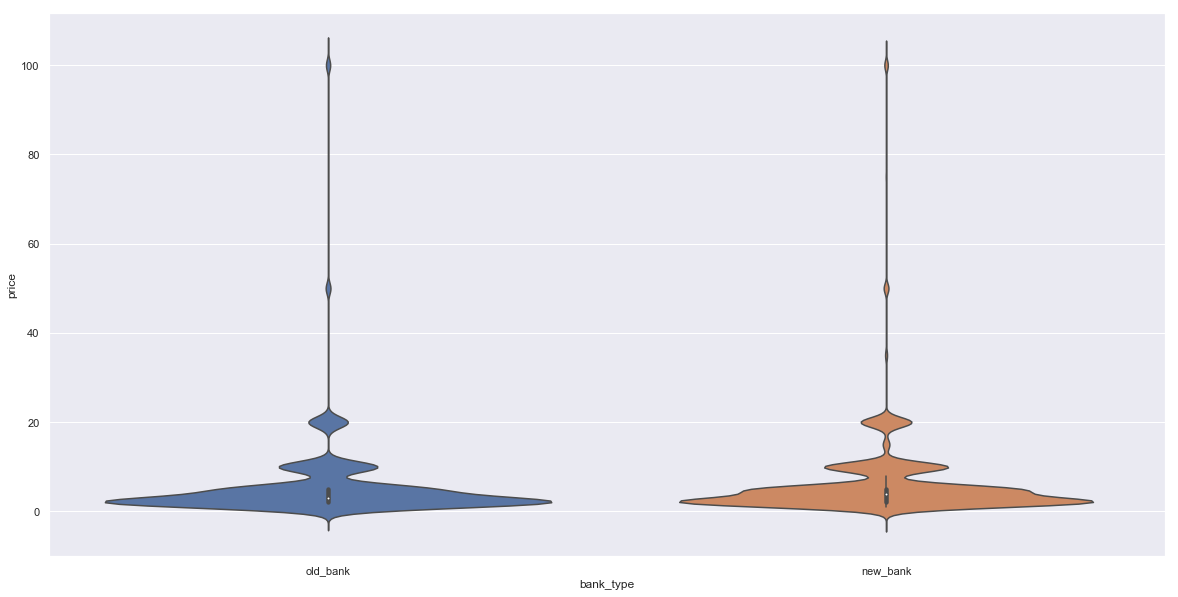

In [16]:
print('average bill')
print(bank_df.groupby(bank_df.bank_type).price.mean())
print('\nmedian bill')
print(bank_df.groupby(bank_df.bank_type).price.median())
sns.violinplot(data=bank_df, y='price', x='bank_type', gridsize=300, cut=5);

Как мы видим и действительно, для дешевых покупок ничего не изменилось в распределениях трат между банками. 

1.4 ~ 1.42

А вот в дорогом сегменте карточек покупок стало существенно больше. 

1.7 > 1.4 почти в 1.3 раза.

In [17]:
# how much new bank best sale low prices packs vs old bank
print('for prices < 10 counts of sale of new and old bank')
bank_df[bank_df.price < 10].bank_type.value_counts()
bank_df[bank_df.price < 10].bank_type.value_counts().new_bank / bank_df[bank_df.price < 10].bank_type.value_counts()

for prices < 10 counts of sale of new and old bank


new_bank    24913
old_bank    17719
Name: bank_type, dtype: int64

new_bank    1.000000
old_bank    1.406005
Name: bank_type, dtype: float64

In [18]:
print('for prices > 10 counts of sale of new and old bank')
bank_df[bank_df.price > 10].bank_type.value_counts()
bank_df[bank_df.price > 10].bank_type.value_counts().new_bank / bank_df[bank_df.price > 10].bank_type.value_counts()
bank_df[bank_df.price > 10].bank_type.value_counts().new_bank / bank_df[bank_df.price > 10].bank_type.value_counts()[1] / norm_coef

for prices > 10 counts of sale of new and old bank


new_bank    2087
old_bank    1170
Name: bank_type, dtype: int64

new_bank    1.000000
old_bank    1.783761
Name: bank_type, dtype: float64

1.2479057613168725

На спецальные паки кажется тоже существенно повлияло смена банка. Причем, тут разница от двух до трех раз, что опять же существенно больше, чем 1.4.

In [19]:
print('piggy distribution by bank type\n\n{}'.format(bank_df[bank_df.pack.str.contains('piggy')].bank_type.value_counts()), end='\n\n')

print('adventure distibution by bank type\n\n{}'.format(bank_df[bank_df.pack.str.contains('advent')].bank_type.value_counts()))

piggy distribution by bank type

new_bank    1725
old_bank     510
Name: bank_type, dtype: int64

adventure distibution by bank type

new_bank    975
old_bank    521
Name: bank_type, dtype: int64


### Умные скидки?

**Посчитаем, как влияет умное предложение на постоянных покупателей**

In [20]:
# define good customers as who buy more then 3 times
good_customers = bank_df.customeruserid.value_counts()[(bank_df.customeruserid.value_counts() > 3)].index
print('amount of good customers {}'.format(len(good_customers)))

# and see what if smart offers affect on good and bad customers
print('\ndistribution and amount of smart_offers of good customers:\n')
print(bank_df[bank_df.customeruserid.isin(good_customers)].pack.value_counts() \
[bank_df[bank_df.customeruserid.isin(good_customers)].pack.value_counts().index.str.contains('smart')])
print('\ndistribution and amount of smart_offers of bad customers:\n')
print(bank_df[~bank_df.customeruserid.isin(good_customers)].pack.value_counts() \
[bank_df[~bank_df.customeruserid.isin(good_customers)].pack.value_counts().index.str.contains('smart')])

amount of good customers 3006

distribution and amount of smart_offers of good customers:

smart_offer_2    413
smart_offer_3    274
smart_offer_4    177
smart_offer_5     57
smart_offer_1     45
smart_offer_6     18
Name: pack, dtype: int64

distribution and amount of smart_offers of bad customers:

smart_offer_1    177
smart_offer_2    172
smart_offer_3     51
smart_offer_4     26
smart_offer_5      2
smart_offer_6      1
Name: pack, dtype: int64


**Фан факт.** Клиент который заплатил через 6 секунд после установки приложения, причем будучи сразу 9 уровня, платил всего три раза и в старом банке, правда второй платеж был на крупную сумму. А кто ждал почти два года до первой оплаты заплатил уже в новом банке и тоже всего три раза.

In [21]:
print('min time between install and pay {}'.format((bank_df.eventdatetime - bank_df.installdatetime).min()))
print('max time between install and pay {}'.format((bank_df.eventdatetime - bank_df.installdatetime).max()))
lcind = bank_df.iloc[0:,0:2].diff(periods = 1, axis=1).nsmallest(1, 'installdatetime').index
fcind = bank_df.iloc[0:,0:2].diff(periods = -1, axis=1).nsmallest(1, 'eventdatetime').index
bank_df[bank_df.customeruserid.isin(bank_df.iloc[[lcind[0], fcind[0]]].customeruserid)]

min time between install and pay 0 days 00:00:06
max time between install and pay 533 days 08:31:58


,eventdatetime,installdatetime,user_level,pack,price,customeruserid,countrycode,bank_type
24322,2018-07-24 09:33:01,2017-02-18 20:51:00,100,pack_2,4.99,7B057292-CA40-4491-A5DE-40B395C3A304,CA,new_bank
27703,2018-07-29 09:31:37,2017-02-18 20:51:00,103,pack_3,9.99,7B057292-CA40-4491-A5DE-40B395C3A304,CA,new_bank
32962,2018-08-06 05:22:58,2017-02-18 20:51:00,103,adventure_pack,4.99,7B057292-CA40-4491-A5DE-40B395C3A304,CA,new_bank
34801,2018-05-18 14:18:43,2018-05-18 14:18:37,9,pack_3,9.99,31F22D78-5C12-4E79-87CB-B870EF5FE171,CN,old_bank
35631,2018-05-20 13:54:24,2018-05-18 14:18:37,17,pack_6,99.99,31F22D78-5C12-4E79-87CB-B870EF5FE171,CN,old_bank
37995,2018-05-22 15:19:59,2018-05-18 14:18:37,32,starter_pack,2.99,31F22D78-5C12-4E79-87CB-B870EF5FE171,CN,old_bank


Хорошо, найдем всех пользователей, которые покупали и в старом банке и в новом банке. И посмотрим у них средний чек по банкам.

In [22]:
temptable = bank_df[bank_df.customeruserid.duplicated(False)].sort_values(by='customeruserid').reset_index().drop('index',axis=1)
custid = set()
endofindex = temptable.index.max()
for ind in temptable.index:
    if ind == endofindex:
        pass
    elif ((temptable.iat[ind, 5] == temptable.iat[ind+1, 5]) & (temptable.iat[ind, 7] != temptable.iat[ind+1, 7])):
        custid.add(temptable.iat[ind, 5])

In [23]:
print('avg check \n{}'.format(
bank_df[bank_df.customeruserid.isin(custid)].groupby('bank_type').price.mean()))
print('\nmedian check \n{}'.format(
bank_df[bank_df.customeruserid.isin(custid)].groupby('bank_type').price.median()))

avg check 
bank_type
new_bank    6.350488
old_bank    5.657405
Name: price, dtype: float64

median check 
bank_type
new_bank    4.99
old_bank    1.99
Name: price, dtype: float64


Как видно, новый банк положительно повлиял на средний чек, а также медиана выросла, что говорит нам о том, что больше половины людей стали покупать более дорогие карточки

## Итоги
Вроде вполне понятно, что новый банк привел к увеличению выручки, а также увеличению среднего чека и пользовательского поведения, в сторону покупок более дорогих карточек с валютой. 
Можно все проверить статистически, но на мой взгляд все наглядно и так.
Умные предложения не вносят пока существенной разницы в поведении кажется, тем более рано еще судить, так как их относительно недавно ввели, первая покупка по ним была в августе. 
Еще не накопилось достаточно данных, хотя уже можно сказать, что те платил раньше с охотой пользуются этими предложениями, а те, 
кто раньше не платил, некоторые все таки начали именно с этих умных предложений. 
Понятно, что из данных не выжато еще все. Можно еще проверить некоторые гипотезы, посмотреть зависимость от времени в покупках, от страны, и того как растет уровень в зависимости от оплат. 
Если же добавить данных, то станет что то еще более понятным. 
В остальном же, гипотезы первоначально проверены, стоит копать дальше в конкретное какое то поведени.